Rows     :  7043
Columns  :  21
Rows     :  7032


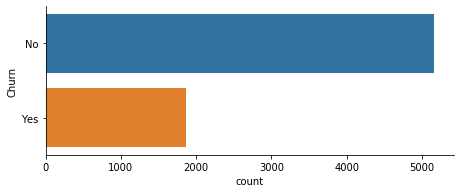

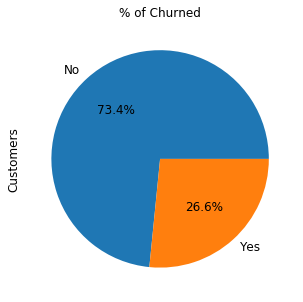

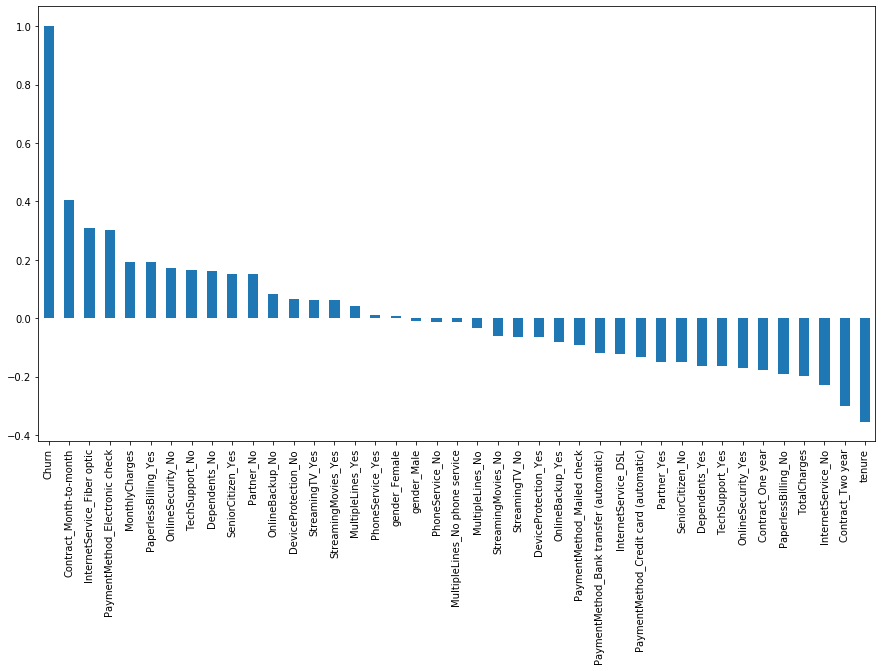

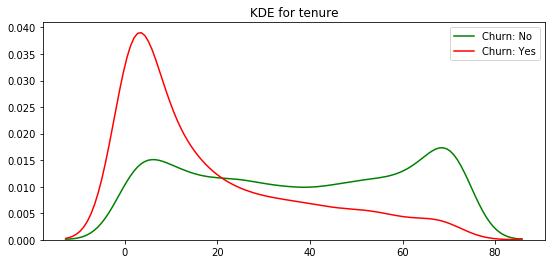

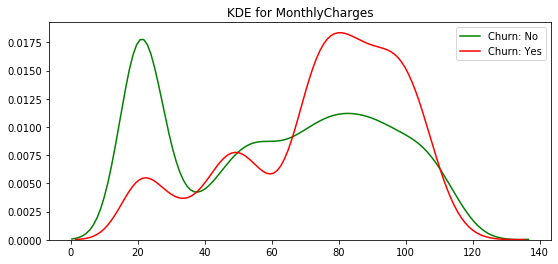

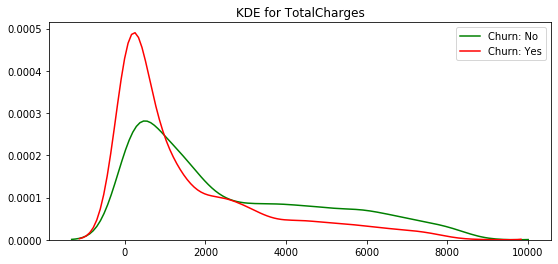

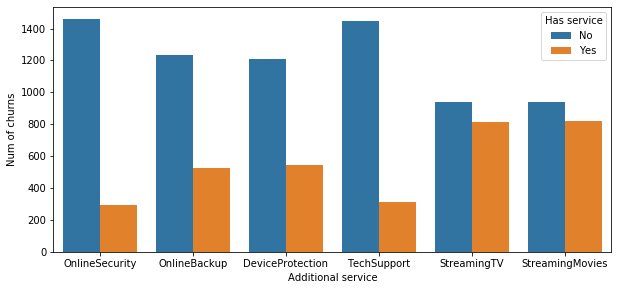

Intercept: [-0.92488597]
Regression: [[ 0.26288194  0.0156189  -0.19827594 -0.03213188 -0.80630886  0.17264094
   0.35664003 -0.51676196 -0.28022162 -0.12779277 -0.4687334  -0.62932378
   0.33493308 -0.14225771  0.02214958]]
Accuracy of logistic regression classifier on test set: 0.82
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1050
           1       0.66      0.55      0.60       357

    accuracy                           0.82      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.81      0.82      0.81      1407



/home/govind/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



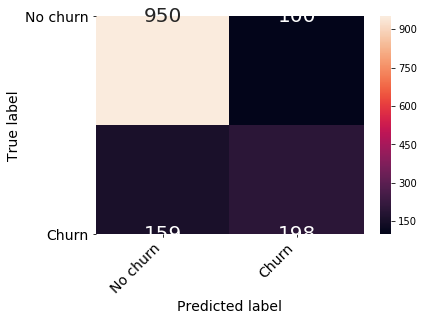

/home/govind/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Accuracy of logistic regression classifier on test set: 0.75
              precision    recall  f1-score   support

           0       0.76      0.73      0.75      1046
           1       0.74      0.77      0.75      1020

    accuracy                           0.75      2066
   macro avg       0.75      0.75      0.75      2066
weighted avg       0.75      0.75      0.75      2066



/home/govind/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/home/govind/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



Accuracy of decision tree unpruned classifier on test set: 0.81
Accuracy of random forest classifier on test set: 0.78
Accuracy of random forest classifier on test set: 0.89


/home/govind/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



Accuracy of random forest classifier on test set: 0.78


In [8]:
%run Data_Analysis.ipynb
# telcompos= df.loc[telcom1['Churn'] == 1]
# telcomneg= df.loc[telcom1['Churn'] == 0]
telcom1 = telcom1.values.tolist()
# telcompos= telcompos.values.tolist()
# telcomneg= telcomneg.values.tolist()

In [9]:
telcom1

[[0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 29.85, 0],
 [0, 0, 0, 34, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 56.95, 0],
 [0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 53.85, 1],
 [0, 0, 0, 45, 0, 0, 1, 1, 0, 1, 1, 1, 0, 2, 42.3, 0],
 [0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 70.7, 1],
 [0, 0, 0, 8, 1, 1, 2, 0, 0, 1, 0, 0, 1, 0, 99.65, 1],
 [0, 0, 1, 22, 1, 1, 2, 0, 1, 0, 0, 0, 1, 3, 89.1, 0],
 [0, 0, 0, 10, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 29.75, 0],
 [0, 1, 0, 28, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 104.8, 1],
 [0, 0, 1, 62, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 56.15, 0],
 [0, 1, 1, 13, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 49.95, 0],
 [0, 0, 0, 16, 1, 0, 0, 0, 0, 0, 0, 2, 0, 3, 18.95, 0],
 [0, 1, 0, 58, 1, 1, 2, 0, 0, 1, 0, 1, 0, 3, 100.35, 0],
 [0, 0, 0, 49, 1, 1, 2, 0, 1, 1, 0, 0, 1, 2, 103.7, 1],
 [0, 0, 0, 25, 1, 0, 2, 1, 0, 1, 1, 0, 1, 0, 105.5, 0],
 [0, 1, 1, 69, 1, 1, 2, 1, 1, 1, 1, 2, 0, 3, 113.25, 0],
 [0, 0, 0, 52, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 20.65, 0],
 [0, 0, 1, 71, 1, 1, 2, 1, 0, 1, 0, 2, 0, 2, 106.7, 0

In [10]:
telcompos=[]
telcomneg=[]
for i in range(0,len(telcom1)):
    if telcom1[i][15]==1:
        telcompos.append(telcom1[i])
    else:
        telcomneg.append(telcom1[i])

In [11]:
len(telcompos)

1869

In [12]:
import DecisionTree

In [ ]:
#!/usr/bin/env python3

import CSVReader
import logging
import random
from concurrent.futures import ProcessPoolExecutor
from DecisionTree import DecisionTreeClassifier


class RandomForestClassifier(object):

    """
    :param  nb_trees:       Number of decision trees to use
    :param  nb_samples:     Number of samples to give to each tree
    :param  max_depth:      Maximum depth of the trees
    :param  max_workers:    Maximum number of processes to use for training
    """
    def __init__(self, nb_trees, nb_samples, max_depth=-1, max_workers=1):
        self.trees = []
        self.nb_trees = nb_trees
        self.nb_samples = nb_samples
        self.max_depth = max_depth
        self.max_workers = max_workers

    
    def sampler(self, data):
            alpha = random.uniform(0.05, 0.15)
            positive = random.sample(telcompos, int(alpha*self.nb_samples))
            negative = random.sample(telcomneg, int((1-alpha)*self.nb_samples)+1)
            total = positive+negative
            return total
    """
    Trains self.nb_trees number of decision trees.
    :param  data:   A list of lists with the last element of each list being
                    the value to predict
    """
    def fit(self, data):
        with ProcessPoolExecutor(max_workers=self.max_workers) as executor:

            print(len(total))
            print(len(random.sample(data, self.nb_samples)))
            rand_fts = map(lambda x: [x, self.sampler(data)], range(self.nb_trees))
            self.trees = list(executor.map(self.train_tree, rand_fts))

    """
    Trains a single tree and returns it.
    :param  data:   A List containing the index of the tree being trained
                    and the data to train it
    """
    def train_tree(self, data):
        
        logging.info('Training tree {}'.format(data[0] + 1))
        tree = DecisionTreeClassifier(max_depth=self.max_depth)

        tree.fit(data[1])
        return tree

    """
    Returns a prediction for the given feature. The result is the value that
    gets the most votes.
    :param  feature:    The features used to predict
    """
    def predict(self, feature):
        predictions = []

        for tree in self.trees:
            predictions.append(tree.predict(feature))

        return max(set(predictions), key=predictions.count)


def test_rf():
    from sklearn.model_selection import train_test_split

    #data = CSVReader.read_csv("income.csv")
    data= telcom1
    print(type(data))
    train, test = train_test_split(data, test_size=0.3)

    rf = RandomForestClassifier(nb_trees=60, nb_samples=1400, max_workers=4)
    rf.fit(train)

    errors = 0
    features = [ft[:-1] for ft in test]
    values = [ft[-1] for ft in test]

    for feature, value in zip(features, values):
        prediction = rf.predict(feature)
        if prediction != value:
            errors += 1

    logging.info("Error rate: {}".format(errors / len(features) * 100))
    print("Error rate: {}".format(errors / len(features) * 100))
    print("Accuracy: {}".format(100-errors / len(features) * 100))


if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    test_rf()

In [ ]:
telcompos

In [6]:
alpha = random.uniform(0.05, 0.15)
positive = random.sample(telcompos, int(30*alpha))
negative = random.sample(telcomneg, int(30*(1-alpha)))
total = positive+negative
print(int(30*alpha))
print(int(30*(1-alpha)))
print(len(total))
w1= 1-alpha
w2= alpha

3
26
29
